In [1]:
"""
데이터 세트는 2000개의 레코드와 8개의 열로 구성됩니다.
고객 ID : CustomerID
성별 : Gender
나이 : Age
연간 소득 : AnnualIncome
지출 점수 - 고객 행동 및 지출 특성에 따라 상점에서 할당한 점수 : SpendingScore
직업 : Profession
업무 경험 - 년 : WorkExperience
가족 규모 : FamilySize
"""

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
cm = pd.read_csv("C:/Users/rlaeo/OneDrive/바탕 화면/Customers.csv")
print("나이 : ",cm['Age'].mean(),
      "\n소득 : ",cm['AnnualIncome'].mean(),
      "\n지출 점수 :",cm['SpendingScore'].mean(),
      "\n가족 규모 : ",cm['FamilySize'].mean())
      #TEST3
      
      

나이 :  48.96 
소득 :  110731.8215 
지출 점수 : 50.9625 
가족 규모 :  3.7685


In [2]:
def test(Age,SpendingScore):
    name = ""
    if (Age <= 20) : name = "청소년"
    elif (Age <= 25) & (SpendingScore > 80): name = "청소년(VIP)"
    elif (Age <= 25) & (SpendingScore < 80): name = "대학생"
    elif (Age <= 25) & (SpendingScore > 80): name = "대학생(VIP)"
    elif (Age <= 30) & (SpendingScore < 80): name = "사회초년생"
    elif (Age <= 30) & (SpendingScore > 80): name = "사회초년생(VIP)"
    elif (Age <= 55) & (SpendingScore < 80): name = "중년"
    elif (Age <= 55) & (SpendingScore > 80): name = "중년(VIP)"
    elif (Age >= 55) & (SpendingScore < 80): name = "노인"
    elif (Age >= 55) & (SpendingScore > 80): name = "노인(VIP)"
    
    return name

cm["나이대"] = cm[["Age", "SpendingScore"]].apply(lambda x: test(x[0], x[1]), axis=1)
print(cm["나이대"])

#나이대와 지출점수로 vip차별화(apply,lambda)

0            청소년
1       청소년(VIP)
2            청소년
3            대학생
4             중년
          ...   
1995          노인
1996          노인
1997          노인
1998          노인
1999          노인
Name: 나이대, Length: 2000, dtype: object


In [3]:
cm.groupby("Gender")["WorkExperience"].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1186.0,4.035413,3.884896,0.0,1.0,3.0,7.0,17.0
Male,814.0,4.200246,3.976307,0.0,1.0,3.5,8.0,17.0


In [6]:
cm.describe(include="all")

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize,나이대
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000,2000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN,10
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN,노인
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN,684
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500,NaN
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749,NaN
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,NaN
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000,NaN
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000,NaN
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000,NaN


Axes(0.125,0.11;0.775x0.77)


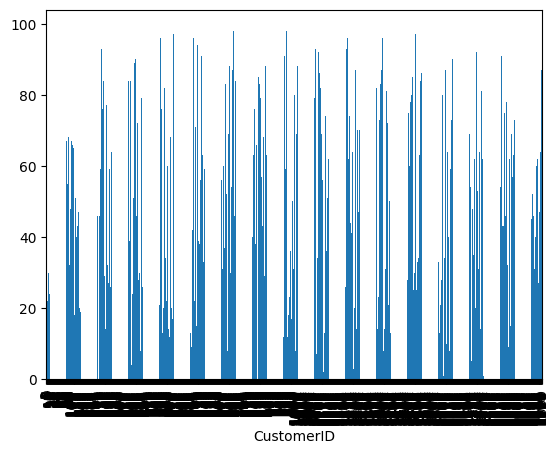

In [16]:
sum = cm.groupby(['CustomerID'])['Age'].mean()
print(sum.plot(kind='bar',rot=90))